In [10]:
import os
import sys

project_root = 'E:\Market Analysis of Cryptocurrency'
backend_path = os.path.join(project_root, 'backend')

print(f"Current Working Directory: {os.getcwd()}")
print(f"Current Python Path: {sys.path}")

if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added project root to sys.path: {project_root}")

if backend_path not in sys.path:
    sys.path.insert(0, backend_path)
    print(f"Added backend path to sys.path: {backend_path}")

print(f"Updated Python Path: {sys.path}")


Current Working Directory: e:\Market Analysis of Cryptocurrency
Current Python Path: ['E:\\Market Analysis of Cryptocurrency\\backend', 'E:\\Market Analysis of Cryptocurrency', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312', '', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\win32', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\Pythonwin']
Updated Python Path: ['E:\\Market Analysis of Cryptocurrency\\backend', 'E:\\Market Analysis of Cryptocurrency', 'c:\\Users\\bhumi\\AppData\\Local\\Programs\\Pytho

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\bhumi\AppData\Local\Temp\ipykernel_2796\2850814091.py:4: SyntaxWarning: invalid escape sequence '\M'
  project_root = 'E:\Market Analysis of Cryptocurrency'


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Added classification_report
from sklearn.model_selection import train_test_split # Added this import
import matplotlib.pyplot as plt
import seaborn as sns
from backend.historical_data import get_crypto_historical_data
from backend.prediction_model import _prepare_data, _create_sequences
import joblib
import xgboost as xgb

# Custom MAPE function (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [12]:
ticker = 'BTC-USD'
get_crypto_historical_data(ticker)

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-08-20 00:00:00+00:00,112828.023438,114625.796875,112387.960938,114274.742188,67993811526
2025-08-21 00:00:00+00:00,114275.687500,114802.648438,111986.234375,112419.031250,57817883700
2025-08-22 00:00:00+00:00,112433.734375,117377.398438,111678.945312,116874.085938,82528088240


In [13]:
file_path = os.path.join(backend_path, 'data', 'historical_crypto_data', f'{ticker.lower()}_historical_data.csv')
df = pd.read_csv(file_path, index_col=0, parse_dates=True)
df.head()

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100


# Price Prediction Model Evaluation

In [14]:
# Load the model and scaler
# Note: Models are assumed to be pre-trained and loaded from disk for evaluation.
# If you need to re-train them, please run the respective training scripts (e.g., train_sentiment_model.py) or the training sections within prediction_model.py.
price_model = xgb.XGBRegressor()
price_model.load_model(os.path.join(project_root, 'models', 'price_prediction_model.keras'))
price_scaler_X = joblib.load(os.path.join(project_root, 'models', 'price_scaler_X.pkl'))

In [15]:
# Prepare the data
df_prepared = _prepare_data(df.copy())
df_prepared['sentiment_score'] = 0.5 # Adding a neutral sentiment score for now

# Create lagged features
look_back = 30
base_features = ['close', 'volume', 'sentiment_score', 'SMA_7', 'SMA_30', 'RSI', 'MACD', 'Upper_Band', 'Lower_Band']
enhanced_features = base_features + ['RSI_9', 'RSI_21', 'RSI_30', 'price_position', 'vol_regime', 'volume_ratio']
lagged_frames = []
for feature in enhanced_features:
    for i in range(1, look_back + 1):
        lagged_frames.append(df_prepared[feature].shift(i).rename(f'{feature}_lag{i}'))

df_prepared = pd.concat([df_prepared] + lagged_frames, axis=1)
df_prepared = df_prepared.dropna()

# Define features and target
lagged_features = [f'{feature}_lag{i}' for feature in enhanced_features for i in range(1, look_back + 1)]
features = enhanced_features + lagged_features

# Calculate tomorrow_log_return for the target
df_prepared['tomorrow_log_return'] = np.log(df_prepared['close']).diff().shift(-1)
df_prepared = df_prepared.dropna() # Drop NaNs created by shift and diff

# Split data
train_size = int(len(df_prepared) * 0.8)
train_df = df_prepared[:train_size]
test_df = df_prepared[train_size:]

# Scale features
X_test = price_scaler_X.transform(test_df[features])
y_test_log_return = test_df['tomorrow_log_return'] # Actual log returns

# Debugging prints for price prediction
print(f"Shape of X_test (Price Prediction): {X_test.shape}")
print(f"Sample of X_test (Price Prediction, first 5 rows):\n{X_test[:5]}")
print(f"Min of X_test (Price Prediction): {np.min(X_test)}")
print(f"Max of X_test (Price Prediction): {np.max(X_test)}")
print(f"Mean of X_test (Price Prediction): {np.mean(X_test)}")
print(f"Std of X_test (Price Prediction): {np.std(X_test)}")

# Make predictions (these are log returns)
y_pred_log_return = price_model.predict(X_test)

# Debugging prints for predicted log returns
print(f"Sample of y_pred_log_return (Price Prediction, first 5 values): {y_pred_log_return[:5]}")
print(f"Min of y_pred_log_return (Price Prediction): {np.min(y_pred_log_return)}")
print(f"Max of y_pred_log_return (Price Prediction): {np.max(y_pred_log_return)}")
print(f"Mean of y_pred_log_return (Price Prediction): {np.mean(y_pred_log_return)}")
print(f"Std of y_pred_log_return (Price Prediction): {np.std(y_pred_log_return)}")

# Convert log returns to actual prices for evaluation and plotting
# Align test_df['close'] with y_test_log_return index
aligned_close_prices = test_df['close'].loc[y_test_log_return.index]
aligned_prev_close_prices = test_df['close'].shift(1).reindex(y_test_log_return.index)


# Calculate predicted prices
y_pred_price = np.exp(y_pred_log_return) * aligned_prev_close_prices

# Actual prices for comparison
y_test_price = aligned_close_prices

valid_idx = y_test_price.dropna().index.intersection(y_pred_price.dropna().index)

y_test_price = y_test_price.loc[valid_idx]
y_pred_price = y_pred_price.loc[valid_idx]

print(f"Valid samples for evaluation: {len(valid_idx)}")
# Evaluate the model using actual prices
mae = mean_absolute_error(y_test_price, y_pred_price)
mse = mean_squared_error(y_test_price, y_pred_price)
r2 = r2_score(y_test_price, y_pred_price)
mape = mean_absolute_percentage_error(y_test_price, y_pred_price) # Calculate MAPE

print(f'\n--- Price Prediction Metrics (on Actual Prices) ---')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'MAPE: {mape}%') # Print MAPE

C:\Users\bhumi\AppData\Local\Temp\ipykernel_2796\2006582045.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_prepared['tomorrow_log_return'] = np.log(df_prepared['close']).diff().shift(-1)


Shape of X_test (Price Prediction): (785, 465)
Sample of X_test (Price Prediction, first 5 rows):
[[0.28622085 0.01086526 0.24       ... 0.0921838  0.22930624 0.23191949]
 [0.28673638 0.01505119 0.24       ... 0.11727409 0.0921838  0.22930624]
 [0.29573425 0.02876057 0.24       ... 0.3686523  0.11727409 0.0921838 ]
 [0.28937043 0.02164022 0.24       ... 0.36565001 0.3686523  0.11727409]
 [0.28494572 0.02068776 0.24       ... 0.30951475 0.36565001 0.3686523 ]]
Min of X_test (Price Prediction): -0.014791998170548035
Max of X_test (Price Prediction): 1.8894291358669162
Mean of X_test (Price Prediction): 0.5832385443107302
Std of X_test (Price Prediction): 0.4152528412668853
Sample of y_pred_log_return (Price Prediction, first 5 values): [ 0.00134917  0.01725647 -0.01228463 -0.00830245 -0.01977189]
Min of y_pred_log_return (Price Prediction): -0.08681882172822952
Max of y_pred_log_return (Price Prediction): 0.11390753090381622
Mean of y_pred_log_return (Price Prediction): -0.00151411851402

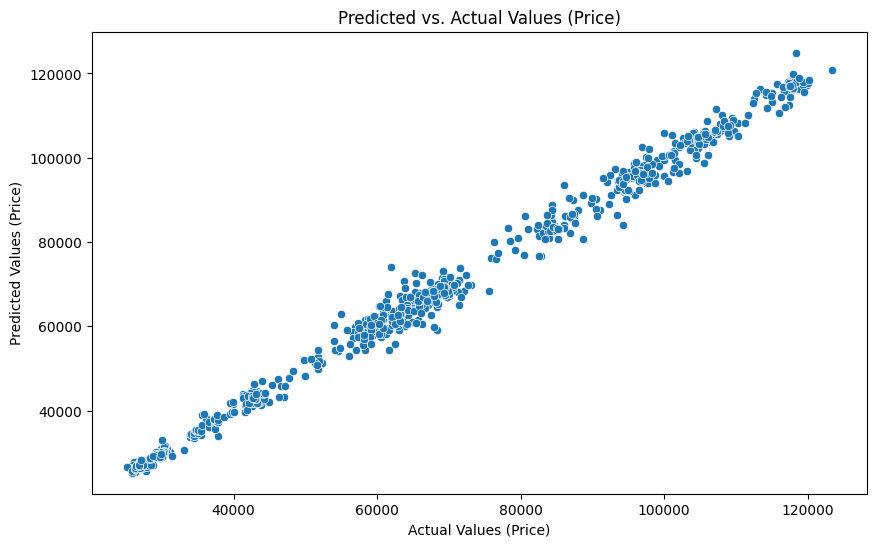

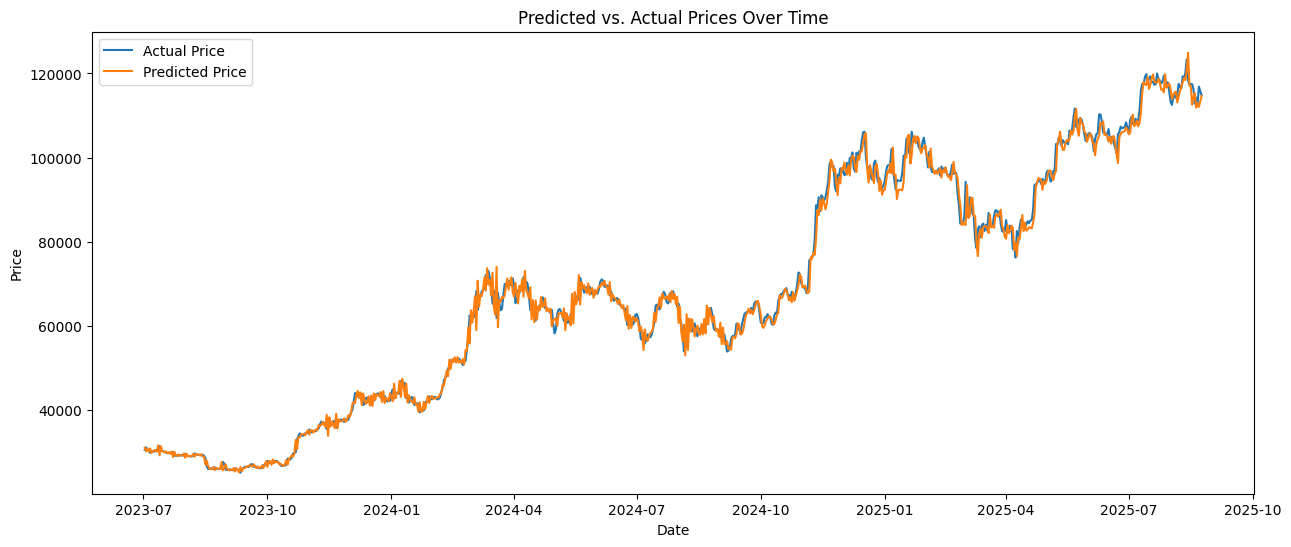

In [16]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_price, y=y_pred_price)
plt.xlabel('Actual Values (Price)')
plt.ylabel('Predicted Values (Price)')
plt.title('Predicted vs. Actual Values (Price)')
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(y_test_price.index, y_test_price, label='Actual Price')
plt.plot(y_pred_price.index, y_pred_price, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted vs. Actual Prices Over Time')
plt.legend()
plt.show()

# Direction Prediction Model Evaluation

Shape of X_test_direction (Direction Prediction): (701, 90, 21)
Sample of X_test_direction (Direction Prediction, first 5 rows):
[[[0.31872067 0.02132959 0.24       ... 0.96136869 0.77777778 0.1269688 ]
  [0.3153764  0.03229406 0.24       ... 0.9238281  0.77777778 0.19604588]
  [0.32204529 0.03210785 0.24       ... 0.99868875 0.33333333 0.19770621]
  ...
  [0.26517788 0.02300086 0.24       ... 0.9613811  0.33333333 0.22452952]
  [0.25615281 0.0232622  0.24       ... 0.68586965 0.55555556 0.23189528]
  [0.25634368 0.01518234 0.24       ... 0.69169623 0.44444444 0.16442035]]

 [[0.3153764  0.03229406 0.24       ... 0.9238281  0.77777778 0.19604588]
  [0.32204529 0.03210785 0.24       ... 0.99868875 0.33333333 0.19770621]
  [0.31241986 0.02673422 0.24       ... 0.89063987 0.33333333 0.16321489]
  ...
  [0.25615281 0.0232622  0.24       ... 0.68586965 0.55555556 0.23189528]
  [0.25634368 0.01518234 0.24       ... 0.69169623 0.44444444 0.16442035]
  [0.25634083 0.00599915 0.24       ... 0.6

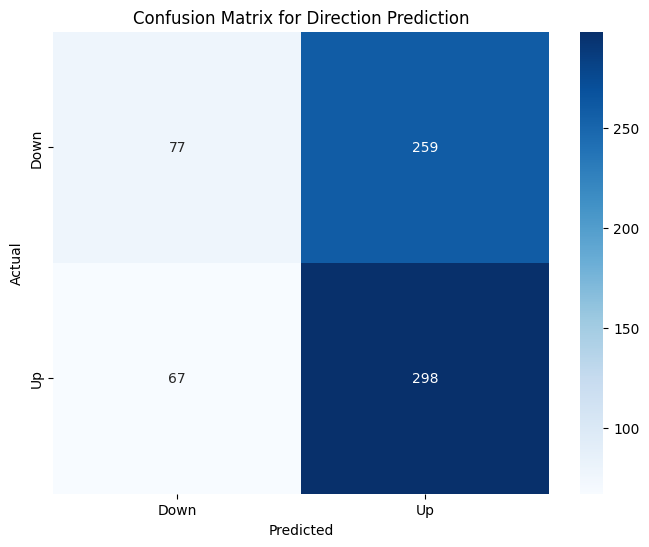

In [17]:
# Load the model and scaler
# Note: Models are assumed to be pre-trained and loaded from disk for evaluation.
# If you need to re-train them, please run the respective training scripts (e.g., train_sentiment_model.py) or the training sections within prediction_model.py.
direction_model = tf.keras.models.load_model(os.path.join(project_root, 'models', 'direction_prediction_model.keras'))
direction_scaler = joblib.load(os.path.join(project_root, 'models', 'direction_scaler.pkl'))

# Prepare the data
df_prepared_direction = _prepare_data(df.copy())
df_prepared_direction['sentiment_score'] = 0.5 # Adding a neutral sentiment score for now

# Create target variable
df_prepared_direction["tomorrow"] = df_prepared_direction["close"].shift(-1)
df_prepared_direction["target"] = (df_prepared_direction["tomorrow"] > df_prepared_direction["close"]).astype(int)
df_prepared_direction = df_prepared_direction.dropna()

# Define features for direction prediction
features_direction = ["close", "volume", 'sentiment_score',
                            'SMA_7', 'EMA_7', 'SMA_30', 'EMA_30', 
                        'RSI', 'MACD', 'Signal_Line', 
                        'Upper_Band', 'Lower_Band', 'return', 'log_return', 'vol_14',
                        'RSI_9', 'RSI_21', 'RSI_30', 'price_position', 'vol_regime', 'volume_ratio']

# Split data
train_size_direction = int(len(df_prepared_direction) * 0.8)
train_df_direction = df_prepared_direction[:train_size_direction]
test_df_direction = df_prepared_direction[train_size_direction:]

# Scale features
scaled_test_data_direction = direction_scaler.transform(test_df_direction[features_direction])

# Create sequences
look_back_direction = 90
X_test_direction, y_test_direction = _create_sequences(scaled_test_data_direction, test_df_direction["target"], look_back_direction)

# Debugging prints for direction prediction
print(f"Shape of X_test_direction (Direction Prediction): {X_test_direction.shape}")
print(f"Sample of X_test_direction (Direction Prediction, first 5 rows):\n{X_test_direction[:5]}")
print(f"Min of X_test_direction (Direction Prediction): {np.min(X_test_direction)}")
print(f"Max of X_test_direction (Direction Prediction): {np.max(X_test_direction)}")
print(f"Mean of X_test_direction (Direction Prediction): {np.mean(X_test_direction)}")
print(f"Std of X_test_direction (Direction Prediction): {np.std(X_test_direction)}")

# Make predictions
y_pred_proba_direction = direction_model.predict(X_test_direction)
y_pred_direction = (y_pred_proba_direction > 0.5).astype(int)

# Debugging prints for direction prediction
print(f"Sample of y_pred_proba_direction (Direction Prediction, first 5 values): {y_pred_proba_direction[:5]}")
print(f"Sample of y_pred_direction (Direction Prediction, first 5 values): {y_pred_direction[:5]}")

# Evaluate the model
accuracy_direction = accuracy_score(y_test_direction, y_pred_direction)
precision_direction = precision_score(y_test_direction, y_pred_direction)
recall_direction = recall_score(y_test_direction, y_pred_direction)
f1_direction = f1_score(y_test_direction, y_pred_direction)

print(f'Accuracy: {accuracy_direction}')
print(f'Precision: {precision_direction}')
print(f'Recall: {recall_direction}')
print(f'F1-Score: {f1_direction}')

print("\nClassification Report (Direction Prediction):\n")
print(classification_report(y_test_direction, y_pred_direction))

# Confusion Matrix
cm = confusion_matrix(y_test_direction, y_pred_direction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Direction Prediction')
plt.show()

# Sentiment Analysis Model Evaluation

Sentiment Model Accuracy: 0.7758
Sentiment Model Precision: 0.7697117733268197
Sentiment Model Recall: 0.7874062968515743
Sentiment Model F1-Score: 0.7784584980237154

Classification Report (Sentiment Analysis):

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      9995
           1       0.77      0.79      0.78     10005

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



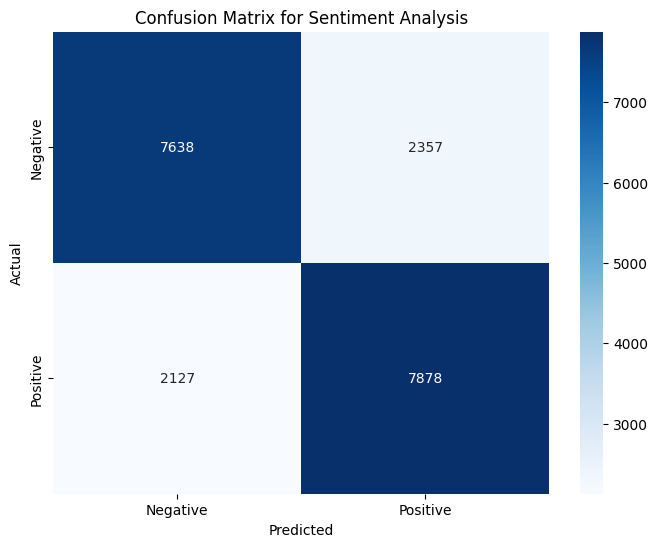

In [18]:
# Load the model and vectorizer
# Note: Models are assumed to be pre-trained and loaded from disk for evaluation.
# If you need to re-train them, please run the respective training scripts (e.g., train_sentiment_model.py) or the training sections within prediction_model.py.
sentiment_model = joblib.load(os.path.join(backend_path, 'models', 'sentiment_model.pkl'))
vectorizer = joblib.load(os.path.join(backend_path, 'models', 'vectorizer.pkl'))

# Load the dataset
DATA_PATH = os.path.join(backend_path, 'data', 'training.1600000.processed.noemoticon.csv')
df_sentiment = pd.read_csv(DATA_PATH, encoding='ISO-8859-1', engine='python', header=None)
df_sentiment = df_sentiment[[0, 5]]
df_sentiment.columns = ['sentiment', 'text']

# Sample a smaller dataset for faster evaluation
df_sentiment_sample = df_sentiment.sample(n=100000, random_state=42) # Use the same sample size as training

# Preprocessing: Convert sentiment 4 to 1 for binary classification (positive)
df_sentiment_sample['sentiment'] = df_sentiment_sample['sentiment'].replace(4, 1)

# Split data (using the same test_size as training)
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(df_sentiment_sample['text'], df_sentiment_sample['sentiment'], test_size=0.2, random_state=42)

# Transform text data using the loaded vectorizer
X_test_sentiment_vec = vectorizer.transform(X_test_sentiment)

# Make predictions
y_pred_sentiment = sentiment_model.predict(X_test_sentiment_vec)

# Evaluate the model
accuracy_sentiment = accuracy_score(y_test_sentiment, y_pred_sentiment)
precision_sentiment = precision_score(y_test_sentiment, y_pred_sentiment)
recall_sentiment = recall_score(y_test_sentiment, y_pred_sentiment)
f1_sentiment = f1_score(y_test_sentiment, y_pred_sentiment)

print(f'Sentiment Model Accuracy: {accuracy_sentiment}')
print(f'Sentiment Model Precision: {precision_sentiment}')
print(f'Sentiment Model Recall: {recall_sentiment}')
print(f'Sentiment Model F1-Score: {f1_sentiment}')

print("\nClassification Report (Sentiment Analysis):\n")
print(classification_report(y_test_sentiment, y_pred_sentiment))

# Confusion Matrix
cm_sentiment = confusion_matrix(y_test_sentiment, y_pred_sentiment)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sentiment, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sentiment Analysis')
plt.show()